In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir maya
!mkdir triqui
!mkdir zapoteco


In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd amuzgos
!unzip maya.zip
%cd ..

%cd triqui
!unzip triqui.zip
%cd ..

%cd zapoteco
!unzip zapoteco.zip
%cd ..

/content/maya
Archive:  maya.zip
  inflating: MAYAS/maya (1).docx     
  inflating: MAYAS/maya (1).jpg      
  inflating: MAYAS/maya (10).jpg     
  inflating: MAYAS/maya (100).jpg    
  inflating: MAYAS/maya (101).jpg    
  inflating: MAYAS/maya (102).jpg    
  inflating: MAYAS/maya (103).jpg    
  inflating: MAYAS/maya (104).jpg    
  inflating: MAYAS/maya (105).jpg    
  inflating: MAYAS/maya (106).jpg    
  inflating: MAYAS/maya (107).jpg    
  inflating: MAYAS/maya (108).jpg    
  inflating: MAYAS/maya (109).jpg    
  inflating: MAYAS/maya (11).jpg     
  inflating: MAYAS/maya (110).jpg    
  inflating: MAYAS/maya (111).jpg    
  inflating: MAYAS/maya (112).jpg    
  inflating: MAYAS/maya (113).jpg    
  inflating: MAYAS/maya (114).jpg    
  inflating: MAYAS/maya (115).jpg    
  inflating: MAYAS/maya (116).jpg    
  inflating: MAYAS/maya (117).jpg    
  inflating: MAYAS/maya (118).jpg    
  inflating: MAYAS/maya (119).jpg    
  inflating: MAYAS/maya (12).jpg     
  inflating: MAYA

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/maya/maya.zip
!rm -rf /content/triqui/triqui.zip
!rm -rf /content/zapoteco/zapoteco.zip

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/maya/MAYAS/| wc -l #306
!ls /content/triqui/TRIQUI/ | wc -l #183
!ls /content/zapoteco/ZAPOTECOS/ | wc -l #165

306
183
165


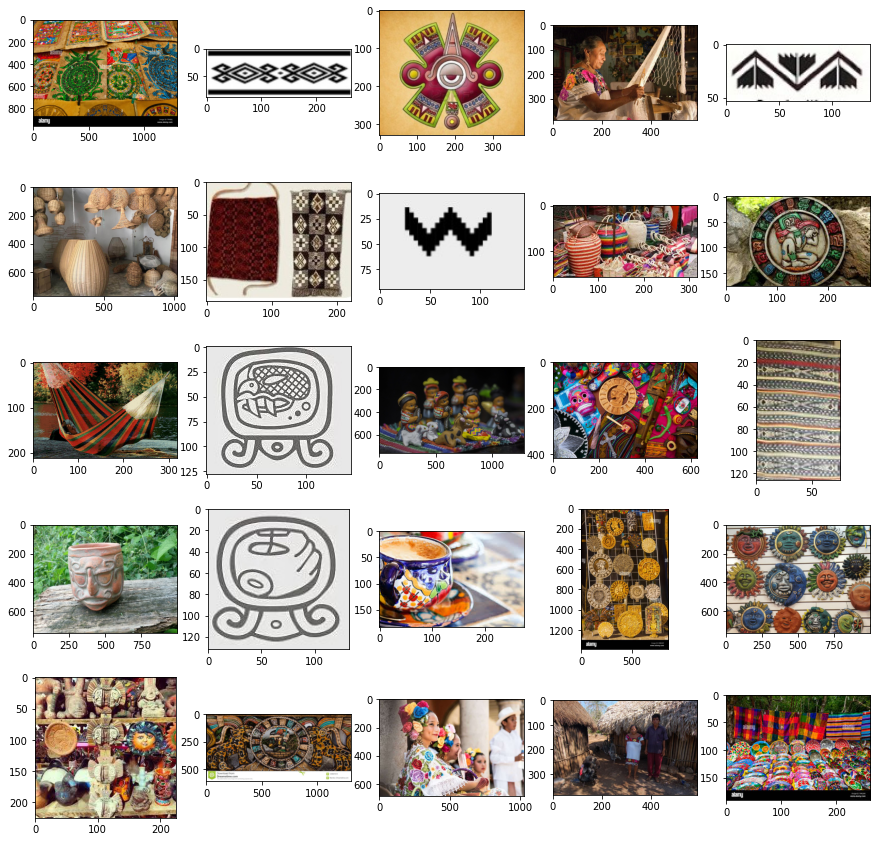

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/maya/MAYAS/'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
!mkdir dataset

In [ ]:

!mkdir dataset/maya
!mkdir dataset/triqui
!mkdir dataset/zapoteco

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/maya/MAYAS/'
carpeta_destino = '/content/dataset/maya'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 160:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/triqui/TRIQUI/'
carpeta_destino = '/content/dataset/triqui'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 160:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/zapoteco/ZAPOTECOS/'
carpeta_destino = '/content/dataset/zapoteco'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 160:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/dataset/maya/ | wc -l #306
!ls /content/dataset/triqui/ | wc -l #183
!ls /content/dataset/zapoteco/ | wc -l #165

160
160
160


Found 383 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


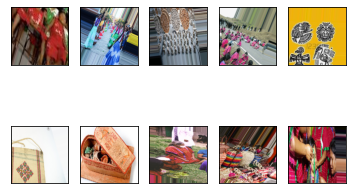

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1024)              3228864   
                                                                 
 dense (Dense)               (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
12/12 [==============================] - 21s 866ms/step - loss: 1.2871 - accuracy: 0.3995 - val_loss: 1.0843 - val_accuracy: 0.4839
Epoch 2/50
12/12 [==============================] - 9s 756ms/step - loss: 0.8780 - accuracy: 0.6110 - val_loss: 0.8675 - val_accuracy: 0.6129
Epoch 3/50
12/12 [==============================] - 9s 743ms/step - loss: 0.6563 - accuracy: 0.7076 - val_loss: 0.7158 - val_accuracy: 0.6989
Epoch 4/50
12/12 [==============================] - 9s 740ms/step - loss: 0.5702 - accuracy: 0.7676 - val_loss: 0.5780 - val_accuracy: 0.7204
Epoch 5/50
12/12 [==============================] - 9s 735ms/step - loss: 0.4982 - accuracy: 0.7990 - val_loss: 0.6821 - val_accuracy: 0.6989
Epoch 6/50
12/12 [==============================] - 9s 732ms/step - loss: 0.4684 - accuracy: 0.8251 - val_loss: 0.5969 - val_accuracy: 0.7742
Epoch 7/50
12/12 [==============================] - 9s 733ms/step - loss: 0.4512 - accuracy: 0.8198 - val_loss: 0.5582 - val_accuracy: 0.7634
Epoch

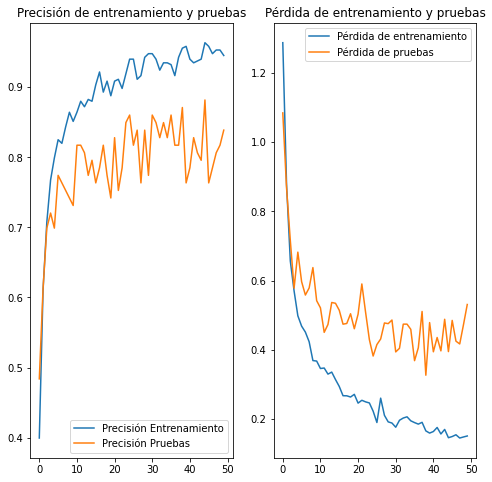

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()